In [ ]:
%pip show spacy

Name: spacy
Version: 3.7.5
Summary: Industrial-strength Natural Language Processing (NLP) in Python
Home-page: https://spacy.io
Author: Explosion
Author-email: contact@explosion.ai
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: catalogue, cymem, jinja2, langcodes, murmurhash, numpy, packaging, preshed, pydantic, requests, setuptools, spacy-legacy, spacy-loggers, srsly, thinc, tqdm, typer, wasabi, weasel
Required-by: en-core-web-sm, fastai


In [ ]:
 %ls /usr/local/lib/python3.11/dist-packages/spacy/pipeline

attributeruler.py                               pipe.pyx
dep_parser.cpython-311-x86_64-linux-gnu.so*     __pycache__/
dep_parser.pyx                                  sentencizer.cpython-311-x86_64-linux-gnu.so*
_edit_tree_internals/                           sentencizer.pyx
edit_tree_lemmatizer.py                         senter.cpython-311-x86_64-linux-gnu.so*
entity_linker.py                                senter.pyx
entityruler.py                                  spancat.py
functions.py                                    span_finder.py
__init__.py                                     span_ruler.py
legacy/                                         tagger.cpython-311-x86_64-linux-gnu.so*
lemmatizer.py                                   tagger.pyx
morphologizer.cpython-311-x86_64-linux-gnu.so*  textcat_multilabel.py
morphologizer.pyx                               textcat.py
multitask.cpython-311-x86_64-linux-gnu.so*      tok2vec.py
multitask.pyx                                   trainable_p

In [ ]:
%rm /usr/local/lib/python3.11/dist-packages/spacy/pipeline/lemmatizer.py
%ls /usr/local/lib/python3.11/dist-packages/spacy/pipeline

attributeruler.py                               pipe.pyx
dep_parser.cpython-311-x86_64-linux-gnu.so*     __pycache__/
dep_parser.pyx                                  sentencizer.cpython-311-x86_64-linux-gnu.so*
_edit_tree_internals/                           sentencizer.pyx
edit_tree_lemmatizer.py                         senter.cpython-311-x86_64-linux-gnu.so*
entity_linker.py                                senter.pyx
entityruler.py                                  spancat.py
functions.py                                    span_finder.py
__init__.py                                     span_ruler.py
legacy/                                         tagger.cpython-311-x86_64-linux-gnu.so*
morphologizer.cpython-311-x86_64-linux-gnu.so*  tagger.pyx
morphologizer.pyx                               textcat_multilabel.py
multitask.cpython-311-x86_64-linux-gnu.so*      textcat.py
multitask.pyx                                   tok2vec.py
ner.cpython-311-x86_64-linux-gnu.so*            trainable_p

In [ ]:
%cp /content/lemmatizer.py /usr/local/lib/python3.11/dist-packages/spacy/pipeline
%ls /usr/local/lib/python3.11/dist-packages/spacy/pipeline

attributeruler.py                               pipe.pyx
dep_parser.cpython-311-x86_64-linux-gnu.so*     __pycache__/
dep_parser.pyx                                  sentencizer.cpython-311-x86_64-linux-gnu.so*
_edit_tree_internals/                           sentencizer.pyx
edit_tree_lemmatizer.py                         senter.cpython-311-x86_64-linux-gnu.so*
entity_linker.py                                senter.pyx
entityruler.py                                  spancat.py
functions.py                                    span_finder.py
__init__.py                                     span_ruler.py
legacy/                                         tagger.cpython-311-x86_64-linux-gnu.so*
lemmatizer.py                                   tagger.pyx
morphologizer.cpython-311-x86_64-linux-gnu.so*  textcat_multilabel.py
morphologizer.pyx                               textcat.py
multitask.cpython-311-x86_64-linux-gnu.so*      tok2vec.py
multitask.pyx                                   trainable_p

# Project

In [ ]:
from spacy import cli

In [ ]:
cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
%pip install pytextrank evaluate rouge_score

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.1 MB/s eta 0:00:00
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=13eb70b5d6a639a99359d5506c78fd3d4cd4074baf070bab975e52bdaed45fc4
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's de

In [ ]:
import re
from os import path
from itertools import chain


import pandas as pd
from pandas import Series, DataFrame

import spacy
import pytextrank
from spacy import displacy

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np

from transformers import BartTokenizer, pipeline

import evaluate

/usr/local/lib/python3.11/dist-packages


In [ ]:
atu_df = pd.read_csv(
    "https://raw.githubusercontent.com/j-hagedorn/trilogy/refs/heads/master/data/atu_df.csv")

atu_df

,chapter,division,sub_division,atu_id,tale_name,litvar,provenance,tale_type,remarks,combos
0,Anecdotes And Jokes,Anecdotes About Other Groups Of People 1850-1874,NaN,1851,Anecdotes about Devout Women,NaN,Latvian: Arjs/Medne 1977; Lithuanian: Kerbelyt...,This miscellaneous type consists of various an...,NaN,NaN
1,Anecdotes And Jokes,Anecdotes About Other Groups Of People 1850-1874,NaN,1853,Anecdotes about Millers,"Stiefel 1895, 254f.; Bebel/Wesselski 1907 I 1,...","French: Pelen 1994, 326ff.; Spanish: cf. Espin...",(Including the previous Types 1853A* and 1853B...,NaN,NaN
2,Anecdotes And Jokes,Anecdotes About Other Groups Of People 1850-1874,NaN,1855,Anecdotes about Jews,"Frey/Bolte 1896, No. 105; Wesselski 1911 I, No...","Finnish: Rausmaa 1982ff. VI, Nos. 546ï¿½548; L...",This miscellaneous type consists of various an...,NaN,NaN
3,Anecdotes And Jokes,Anecdotes About Other Groups Of People 1850-1874,NaN,1855A,Jewish Woman Makes Parents Believe that she Is...,"Kirchhof/Oesterley 1869 I 2, Nos. 50, 55; Bebe...","Finnish: Rausmaa 1982ff., 584; Lithuanian: Ker...",A young Jewish woman (nun) becomes pregnant by...,Documented in the 13th century by Caesarius of...,NaN
4,Anecdotes And Jokes,Anecdotes About Other Groups Of People 1850-1874,NaN,1855B,The Check in the Coffin,NaN,"English: Ranke 1972, No. 90; Frisian: Kooi 198...","On his deathbed, a Jew (farmer) asks his sons ...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2242,Tales Of Magic,Supernatural Tasks 460-499,NaN,480A*,Three Sisters Set out to Save their Little Bro...,NaN,Latvian: Arjs/Medne 1977; Lithuanian: Kerbelyt...,A witch carries away the little brother of thr...,NaN,NaN
2243,Tales Of Magic,Supernatural Tasks 460-499,NaN,480C*,Transporting White Bread to Hell,NaN,Latvian: Arjs/Medne 1977; Lithuanian: Kerbelyt...,A poor brother brings his wealthy brother a gi...,NaN,NaN
2244,Tales Of Magic,Supernatural Tasks 460-499,NaN,480D*,Tales of Kind and Unkind Girls,NaN,"Latvian: Arjs/Medne 1977, No. *480D*; Lappish:...",(Including the previous Types 480* and 480B*.)...,NaN,NaN
2245,Tales Of Magic,Supernatural Tasks 460-499,NaN,485,Borma Jarizhka,NaN,"Finnish: Rausmaa 1982ff. I, No. 61; Wepsian: K...",(Including the previous Type 485A*.) The tsar ...,The episode with the wild woman is also docume...,NaN


In [ ]:
aft = pd.read_csv(
    "https://raw.githubusercontent.com/j-hagedorn/trilogy/refs/heads/master/data/aft.csv")

aft

,atu_id,tale_title,provenance,notes,source,text,data_source,date_obtained
0,910B,The Highlander Takes Three Advices from the En...,Scotland,NaN,"Cuthbert Bede [pseudonym for Edward Bradley], ...",In one of the glens of Cantire there lived a y...,Ashliman's Folktexts,2021-03-10
1,910B,The Prince Who Acquired Wisdom,India,NaN,"Cecil Henry Bompas, Folklore of the Santal Par...",There was once a raja who had an only son and ...,Ashliman's Folktexts,2021-03-10
2,910B,The Three Admonitions,Italy,NaN,"Thomas Frederick Crane, Italian Popular Tales,...",A man once left his country to go to foreign p...,Ashliman's Folktexts,2021-03-10
3,910B,The Three Advices,Ireland,The same story is found in The Rural Repositor...,"T. Crofton Croker, 'The Three Advices: An Iris...",The stories current among the Irish peasantry ...,Ashliman's Folktexts,2021-03-10
4,910B,The Three Advices Which the King with the Red ...,Ireland,NaN,"Patrick Kennedy, Legendary Fictions of the Iri...","The name of the young chief was Illan, called ...",Ashliman's Folktexts,2021-03-10
...,...,...,...,...,...,...,...,...
1513,75,The Mother and the Wolf,Aesop (translated by George Fyler Townsend),NaN,"Three Hundred Ãsop's Fables, literally transl...",A famished Wolf was prowling about in the morn...,Ashliman's Folktexts,2022-05-16
1514,75,The Nurse and the Wolf (3),Aesop (retold by Joseph Jacobs),NaN,"The Fables of Ãsop, selected, told anew, and ...","'Be quiet now,' said an old Nurse to a child s...",Ashliman's Folktexts,2022-05-16
1515,75,"The Wolf, the Mother, and Her Child (2)",Aesop (translated by V. S. Vernon Jones),NaN,"Ãsop's Fables, a new translation by V. S. Ver...",A hungry Wolf was prowling about in search of ...,Ashliman's Folktexts,2022-05-16
1516,75,The Wolf and the Babe,Ambrose Bierce,NaN,"Ambrose Bierce, Fantastic Fables (New York and...","A Famishing Wolf, passing the door of a cottag...",Ashliman's Folktexts,2022-05-16


In [ ]:
aft = aft.merge(atu_df[["chapter", "atu_id"]], on="atu_id")
aft.describe()

,atu_id,tale_title,provenance,notes,source,text,data_source,date_obtained,chapter
count,1518,1518,1502,831,1336,1518,1518,1518,1518
unique,182,1499,405,785,1325,1511,1,3,7
top,275,The Dog and the Wolf,Germany,The material on this site is made available un...,"Source (Internet Archive): Oskar DÃ¤hnhardt, N...",There was once a wily old crocodile who dwelt ...,Ashliman's Folktexts,2021-03-10,Tales Of Magic
freq,31,3,147,13,3,2,1518,1337,450


In [ ]:
nlp = spacy.load(
    "en_core_web_lg", config={"components.lemmatizer.mode": "rule_propn"})
nlp.add_pipe("textrank")

nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7ed1a2403cb0>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7ed1a2403590>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7ed1a24f8580>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7ed1a23d8050>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7ed1a236ac50>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7ed1a24f8c80>),
 ('textrank', <pytextrank.base.BaseTextRankFactory at 0x7ed1a242d8d0>)]

In [ ]:
docs = list(nlp.pipe(aft["tale_title"] + ". " + aft["text"]))
displacy.render(list(docs[228].sents)[1])

In [ ]:
aft["chapter"].value_counts()

,count
chapter,
Tales Of Magic,450
Anecdotes And Jokes,306
Religious Tales,294
Animal Tales,280
Other Tales Of The Supernatural,72
Other Animals And Objects,64
Formula Tales,52


In [ ]:
aft["y"] = LabelEncoder().fit_transform(
    aft["chapter"].replace(
        to_replace={
            "Other Animals And Objects": "Animal Tales",
            "Other Tales Of The Supernatural": "Tales Of Magic"
        }))

aft["y"].value_counts()

,count
y,
4,522
1,344
0,306
3,294
2,52


In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    Series(
        data=[
            " ".join(
                [
                    token.lemma_ for token in doc
                    if token.is_alpha and not token.is_stop
                ])
            for doc in docs
        ]),
    aft["y"], test_size=0.1, random_state=37, stratify=aft["y"])

# Classification: `scikit-learn`'s `TfidfVectorizer`

In [ ]:
min_df = list(range(1, 11))
samples = np.logspace(-3, 3, num=15)

In [ ]:
gridsearchcv = GridSearchCV(
    make_pipeline(
        TfidfVectorizer(sublinear_tf=True),
        LinearSVC(class_weight="balanced", random_state=37)),
    {
        "tfidfvectorizer__ngram_range": [(1, 1), (1, 2)],
        "tfidfvectorizer__min_df": min_df, "linearsvc__C": samples
    },
    scoring=["accuracy", "f1_weighted"],
    n_jobs=-1,
    refit="accuracy",
    error_score="raise")

gridsearchcv.fit(X_train, y_train)
gridsearchcv.best_params_

{'linearsvc__C': 1.0,
 'tfidfvectorizer__min_df': 3,
 'tfidfvectorizer__ngram_range': (1, 1)}

In [ ]:
{
    scoring: gridsearchcv.cv_results_[scoring][gridsearchcv.best_index_]
    for scoring in ["mean_test_accuracy", "mean_test_f1_weighted"]
}

{'mean_test_accuracy': 0.7957487767706745,
 'mean_test_f1_weighted': 0.7930218119168344}

In [ ]:
gridsearchcv1 = GridSearchCV(
    make_pipeline(
        TfidfVectorizer(sublinear_tf=True),
        ComplementNB()),
    {
        "tfidfvectorizer__ngram_range": [(1, 1), (1, 2)],
        "tfidfvectorizer__min_df": min_df, "complementnb__alpha": samples
    },
    scoring=["accuracy", "f1_weighted"],
    n_jobs=-1,
    refit="accuracy",
    error_score="raise")

gridsearchcv1.fit(X_train, y_train)
gridsearchcv1.best_params_

{'complementnb__alpha': 0.13894954943731375,
 'tfidfvectorizer__min_df': 4,
 'tfidfvectorizer__ngram_range': (1, 2)}

In [ ]:
{
    scoring: gridsearchcv1.cv_results_[scoring][gridsearchcv1.best_index_]
    for scoring in ["mean_test_accuracy", "mean_test_f1_weighted"]
}

{'mean_test_accuracy': 0.7378973824229298,
 'mean_test_f1_weighted': 0.7258909190415879}

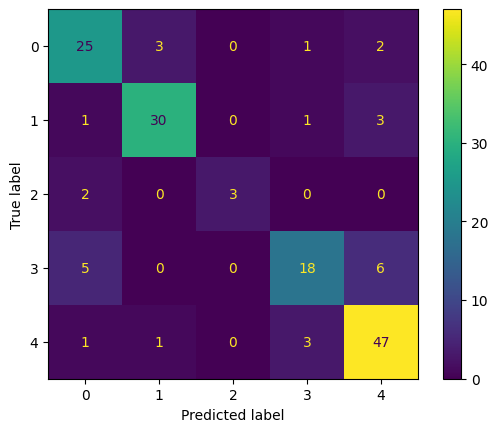

In [ ]:
y_pred = gridsearchcv.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77        31
           1       0.88      0.86      0.87        35
           2       1.00      0.60      0.75         5
           3       0.78      0.62      0.69        29
           4       0.81      0.90      0.85        52

    accuracy                           0.81       152
   macro avg       0.84      0.76      0.79       152
weighted avg       0.81      0.81      0.81       152



# Classification: spaCy's `Tok2Vec` word embedding

In [ ]:
X_train1 = np.vstack([docs[index].vector for index in X_train.index])
X_train1

array([[-1.7888328 ,  1.906205  , -2.776159  , ...,  0.8067305 ,
        -4.0652986 ,  1.3830118 ],
       [-2.1852372 ,  1.0589468 , -1.4962068 , ..., -0.61394584,
        -2.5585926 ,  1.1486895 ],
       [-0.8226368 ,  0.5163193 , -0.25059384, ..., -0.23808391,
        -2.863442  ,  1.3167228 ],
       ...,
       [-0.82426643,  2.4033434 , -1.5427371 , ..., -0.33106926,
        -3.4549296 ,  1.3726978 ],
       [-1.997935  ,  0.24766408, -1.4001039 , ..., -0.11420477,
        -2.77703   ,  0.7800317 ],
       [-2.5069187 ,  0.34411058, -2.1675541 , ..., -1.5087103 ,
        -2.6340642 ,  1.584609  ]], dtype=float32)

In [ ]:
X_test1 = np.vstack([docs[index].vector for index in X_test.index])
X_test1

array([[-1.9579442 ,  0.5556986 , -1.9437459 , ..., -0.5851831 ,
        -3.2886043 ,  0.75799644],
       [-1.3734683 ,  0.7520691 , -0.27804893, ..., -0.45664617,
        -3.6933594 ,  1.9581357 ],
       [-1.8591087 ,  1.1874502 , -2.0697985 , ..., -0.22660643,
        -3.5940883 ,  1.3533324 ],
       ...,
       [-2.0031621 ,  1.4886457 , -2.3172243 , ..., -0.14431678,
        -3.5323293 ,  1.5306182 ],
       [-1.6879039 ,  0.4824157 , -1.9469813 , ..., -0.3350511 ,
        -3.260914  ,  0.63591695],
       [-1.6927693 ,  1.0547962 , -1.9887635 , ..., -0.27137622,
        -3.3171737 ,  1.2877817 ]], dtype=float32)

In [ ]:
gridsearchcv2 = GridSearchCV(
    make_pipeline(
        StandardScaler(),
        LinearSVC(class_weight="balanced", random_state=37)),
    {"linearsvc__C": samples},
    scoring=["accuracy", "f1_weighted"],
    n_jobs=-1,
    refit="accuracy",
    error_score="raise")

gridsearchcv2.fit(X_train1, y_train)
gridsearchcv2.best_params_

{'linearsvc__C': 0.0071968567300115215}

In [ ]:
{
    scoring: gridsearchcv2.cv_results_[scoring][gridsearchcv2.best_index_]
    for scoring in ["mean_test_accuracy", "mean_test_f1_weighted"]
}

{'mean_test_accuracy': 0.6720435282479078,
 'mean_test_f1_weighted': 0.6692759291532566}

In [ ]:
gridsearchcv3 = GridSearchCV(
    make_pipeline(StandardScaler(), KNeighborsClassifier(n_jobs=-1)),
    {
        "kneighborsclassifier__n_neighbors":
            list(range(1, 1 + round(np.sqrt(X_train1.shape[0])))),
        "kneighborsclassifier__weights": ["uniform", "distance"]
    },
    scoring=["accuracy", "f1_weighted"],
    n_jobs=-1,
    refit="accuracy",
    error_score="raise")

gridsearchcv3.fit(X_train1, y_train)
gridsearchcv3.best_params_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__weights': 'distance'}

In [ ]:
{
    scoring: gridsearchcv3.cv_results_[scoring][gridsearchcv3.best_index_]
    for scoring in ["mean_test_accuracy", "mean_test_f1_weighted"]
}

{'mean_test_accuracy': 0.5021924547471992,
 'mean_test_f1_weighted': 0.4637694999581499}

In [ ]:
gridsearchcv4 = GridSearchCV(
    make_pipeline(
        StandardScaler(),
        SVC(class_weight="balanced", break_ties=True, random_state=37)),
    {"svc__C": samples, "svc__gamma": samples},
    scoring=["accuracy", "f1_weighted"],
    n_jobs=-1,
    refit="accuracy",
    error_score="raise")

gridsearchcv4.fit(X_train1, y_train)
gridsearchcv4.best_params_

{'svc__C': 19.306977288832496, 'svc__gamma': 0.001}

In [ ]:
{
    scoring: gridsearchcv4.cv_results_[scoring][gridsearchcv4.best_index_]
    for scoring in ["mean_test_accuracy", "mean_test_f1_weighted"]
}

{'mean_test_accuracy': 0.6691104515922034,
 'mean_test_f1_weighted': 0.6662704284881367}

In [ ]:
gridsearchcv5 = GridSearchCV(
    make_pipeline(
        RandomForestClassifier(
            n_jobs=-1, random_state=37, class_weight="balanced_subsample")),
    {
        "randomforestclassifier__min_samples_leaf":
            np.logspace(0, 2, num=6).astype(int),
        "randomforestclassifier__max_features":
            [1, 2, 3, 5, 8, "log2", "sqrt", None],
        "randomforestclassifier__max_leaf_nodes": [10, 100, 1000, None]
    },
    scoring=["accuracy", "f1_weighted"],
    n_jobs=-1,
    refit="accuracy",
    error_score="raise")

gridsearchcv5.fit(X_train1, y_train)
gridsearchcv5.best_params_

{'randomforestclassifier__class_weight': 'balanced_subsample',
 'randomforestclassifier__max_features': None,
 'randomforestclassifier__max_leaf_nodes': 1000,
 'randomforestclassifier__min_samples_leaf': 1}

In [ ]:
{
    scoring: gridsearchcv5.cv_results_[scoring][gridsearchcv5.best_index_]
    for scoring in ["mean_test_accuracy", "mean_test_f1_weighted"]
}

{'mean_test_accuracy': 0.574634368065025,
 'mean_test_f1_weighted': 0.5463288106550519}

# Summarization

In [ ]:
indexes = aft[
    (aft["provenance"]
     .isin(
         [
             "Giovanni Boccaccio", "Italy, Giambattista Basile",
             "Italy, Giovanni Francesco Straparola",
             "Giovanni Francesco Straparola, The Facetious Nights",
             "Giovanni Battista Basile, Il Pentamerone", "Giambattista Basile",
             "Giovanni Francesco Straparola",
             "Italy, Giambattista Basile, Il Pentamerone",
             "Giovanni Boccaccio, The Decameron",
             "Fiovanni Francesco Straparola"
          ]))].index

indexes

Index([ 136,  141,  166,  251,  267,  474,  578,  580,  642,  662,  704, 1074,
       1087, 1127, 1167, 1169, 1290, 1311, 1493, 1494, 1503, 1504],
      dtype='int64')

In [ ]:
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

In [ ]:
pipeline = pipeline(
    "summarization", model="facebook/bart-large-cnn",
    tokenizer="facebook/bart-large-cnn", use_fast=False)

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
summary_texts = []
for index in indexes:
    text_length = tokenizer(
        docs[index].text, return_tensors="tf", return_length=True)["length"]

    sents = list(docs[index].sents)
    summary_text = []
    if text_length > 512:
        n_texts = int(np.ceil(text_length / 512)[0])
        n_sents = int(np.floor(len(sents) / n_texts))
        for i in range(n_texts):
            summary_text.append(
                pipeline(
                    " ".join(
                        [
                            sent.text
                            for sent in sents[i * n_sents:(i+1) * n_sents]
                        ]),
                    clean_up_tokenization_spaces=True,
                    max_length=128,
                    min_length=64,
                    num_beams=4)[0]["summary_text"])

        if len(sents) - (i+1)*n_sents > round(n_sents / 4):
            summary_text.append(
                pipeline(
                    " ".join(
                        [
                            sent.text
                            for sent in sents[(i+1) * n_sents:len(sents)]
                        ]),
                    clean_up_tokenization_spaces=True,
                    max_length=128,
                    num_beams=4)[0]["summary_text"])

        summary_texts.append("\n".join(summary_text))
    else:
        summary_texts.append(
            pipeline(
                docs[index].text, clean_up_tokenization_spaces=True,
                max_length=128,
                min_length=64, num_beams=5)[0]["summary_text"])

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
Your max_length is set to 128, but your input_length is only 99. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)


In [ ]:
summary_texts[0]

'Filippo Balducci lost his wife to death and decided to devote himself and his young son to God. They lived together in a cave on the slopes of Mount Asinaio. Filippo taught his son about God and the saints, protecting him always from distractions and sin. Only after the boy reached the age of eighteen did the father feel it safe to expose him to the outside world.'

In [ ]:
rouge = evaluate.load("rouge")

In [ ]:
summaries = []
scores = []
for i in range(len(indexes)):
    basetextrank = nlp(aft["text"][indexes[i]])._.textrank
    limit_sentences = len(list(nlp(summary_texts[i]).sents))
    mean_score = -1
    summaries.append(None)
    scores.append(None)
    for limit_phrases in np.unique(np.logspace(0, 3, num=32).astype(int)):
        spans = " ".join(
            span.text
            for span in basetextrank.summary(
                limit_phrases=limit_phrases, limit_sentences=limit_sentences,
                preserve_order=True))

        rouges = rouge.compute(
            predictions=[spans], references=[summary_texts[i]],
            rouge_types=["rouge1", "rouge2", "rougeL"])

        mean_rouge = np.mean(list(rouges.values()))
        if mean_rouge > mean_score:
            summaries[i] = spans
            scores[i] = rouges
            mean_score = mean_rouge

for score in scores:
    print(score)

{'rouge1': 0.6708860759493671, 'rouge2': 0.5, 'rougeL': 0.5569620253164557}
{'rouge1': 0.7255813953488371, 'rouge2': 0.6103286384976525, 'rougeL': 0.5302325581395348}
{'rouge1': 0.6669950738916257, 'rouge2': 0.4092702169625247, 'rougeL': 0.41379310344827586}
{'rouge1': 0.5475166210402815, 'rouge2': 0.34833659491193736, 'rougeL': 0.35588580367618305}
{'rouge1': 0.5982367758186399, 'rouge2': 0.3858764186633039, 'rougeL': 0.3992443324937028}
{'rouge1': 0.3850267379679145, 'rouge2': 0.19677996422182467, 'rougeL': 0.24955436720142601}
{'rouge1': 0.5687126561651277, 'rouge2': 0.34619565217391307, 'rougeL': 0.3378598587724063}
{'rouge1': 0.5311631599841207, 'rouge2': 0.3488279698053238, 'rougeL': 0.3604605001984914}
{'rouge1': 0.5556471558120363, 'rouge2': 0.36168455821635015, 'rougeL': 0.39406430338004944}
{'rouge1': 0.48130841121495327, 'rouge2': 0.23157894736842105, 'rougeL': 0.23714953271028041}
{'rouge1': 0.5397923875432528, 'rouge2': 0.3819444444444444, 'rougeL': 0.4463667820069204}
{'r

In [ ]:
print(summary_texts[1])

Nicostratus, a wealthy patrician, married Lydia, a woman of great distinction and unsurpassed beauty. Lydia found herself paying ever more attention to one of her husband's servants, Pyrrhus. He was attracted to her as well, and gladly would have accepted her invitations to love, but the old man gave them no opportunity.
Pyrrhus and Lydia were able to pluck the fruits of their love at regular intervals, even without the help of their enchanted pear tree. From that time forth Nicostratus relaxed his watchful vigil over his young wife, and thus Pyrrhus, Lydia and their children lived happily ever after.


In [ ]:
summaries[1]

"Nicostratus, a wealthy patrician, married Lydia, a woman of great distinction and unsurpassed beauty. Thus, it is quite understandable that Lydia found herself paying ever more attention to one of her husband's servants, Pyrrhus by name, who was elegant, handsome, young, and energetic. Looking down, what did he behold but Pyrrhus and Lydia making fervent love. Nicostratus climbed down from the tree, only to find Pyrrhus and Lydia seated discretely on a garden bench. From that time forth Nicostratus relaxed his watchful vigil over his young wife, and thus Pyrrhus and Lydia were able to pluck the fruits of their love at regular intervals, even without the help of their enchanted pear tree."